In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# NSE stock listed in  data for last 2 years sample
data=pd.read_csv("/content/NSEBANK.csv")

In [4]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-25,31507.150391,31697.550781,31013.650391,31198.400391,31198.400391,0.0
1,2021-01-27,31236.250000,31287.050781,30165.650391,30284.550781,30284.550781,0.0
2,2021-01-28,29812.300781,30464.400391,29687.699219,30358.300781,30358.300781,0.0
3,2021-01-29,30700.650391,31111.949219,30254.550781,30565.500000,30565.500000,0.0
4,2021-02-01,30976.349609,33305.300781,30906.449219,33089.050781,33089.050781,0.0


In [5]:
data['Date']=pd.to_datetime(data.Date)

In [6]:
data.shape

(497, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       497 non-null    datetime64[ns]
 1   Open       496 non-null    float64       
 2   High       496 non-null    float64       
 3   Low        496 non-null    float64       
 4   Close      496 non-null    float64       
 5   Adj Close  496 non-null    float64       
 6   Volume     496 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 27.3 KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02
mean,37029.161558,37320.096759,36702.969518,37019.662736,37019.662736,3.776656e+06
std,3000.320640,2958.452652,3023.523590,2988.359603,2988.359603,8.073044e+07
min,29812.300781,30464.400391,29687.699219,30284.550781,30284.550781,0.000000e+00
25%,35015.938477,35237.412110,34668.250976,35008.600586,35008.600586,2.910000e+04
50%,36494.550781,36713.974610,36133.000000,36423.400391,36423.400391,1.565500e+05
75%,38747.525390,39118.061524,38518.725586,38747.351563,38747.351563,2.076250e+05
max,44078.601563,44151.800781,43987.949219,44049.101563,44049.101563,1.798102e+09


In [9]:
data.drop('Adj Close',axis=1, inplace=True)

In [10]:
data.isnull().sum()

Date      0
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [28]:
data['Open']       = data['Open'].fillna(data['Open'].value_counts().index.tolist()[0])
data['High']       = data['High'].fillna(data['High'].value_counts().index.tolist()[0])
data['Low'] = data['Low'].fillna(data['Low'].value_counts().index.tolist()[0])
data['Close'] = data['Close'].fillna(data['Close'].value_counts().index.tolist()[0])
data['Volume']       = data['Volume'].fillna(data['Volume'].value_counts().index.tolist()[0])

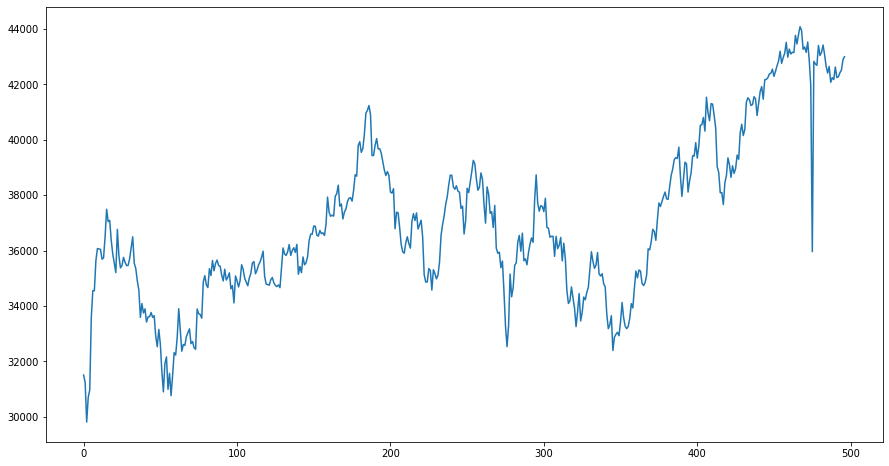

In [29]:
data['Open'].plot(figsize=(15,8))

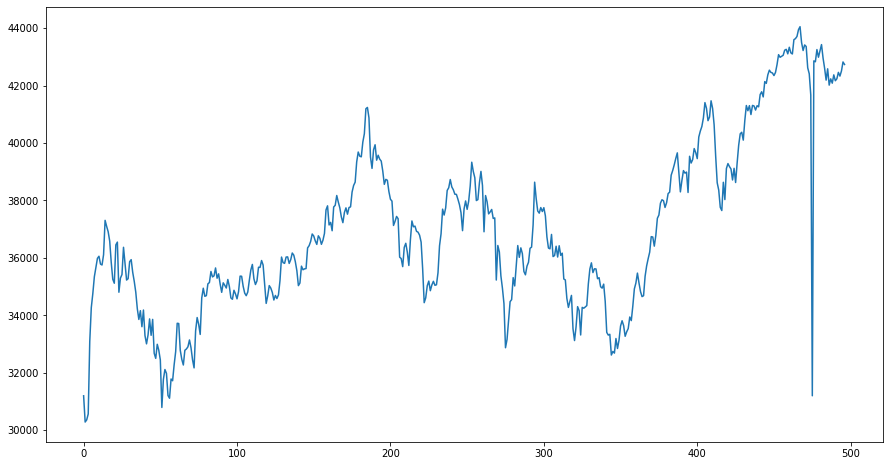

In [30]:
data['Close'].plot(figsize=(15,8))

In [31]:
X_train=data.drop(['Close','Date'],axis=1)

In [32]:
y_train=data['Close']

In [33]:
X_train

,Open,High,Low,Volume
0,31507.150391,31697.550781,31013.650391,0.0
1,31236.250000,31287.050781,30165.650391,0.0
2,29812.300781,30464.400391,29687.699219,0.0
3,30700.650391,31111.949219,30254.550781,0.0
4,30976.349609,33305.300781,30906.449219,0.0
...,...,...,...,...
492,42271.800781,42555.898438,42119.648438,170500.0
493,42416.300781,42506.250000,42234.898438,143400.0
494,42516.050781,42709.199219,42366.148438,159100.0
495,42891.449219,43005.851563,42727.699219,203600.0


In [34]:
y_train

0      31198.400391
1      30284.550781
2      30358.300781
3      30565.500000
4      33089.050781
           ...     
492    42458.000000
493    42328.851563
494    42506.800781
495    42821.250000
496    42733.449219
Name: Close, Length: 497, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

X_Train,X_test,y_Train, y_test=train_test_split(X_train,y_train,test_size=0.3,random_state=0)


In [36]:
X_Train.shape

(347, 4)

In [37]:
X_test.shape

(150, 4)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
model=LinearRegression()

In [39]:
model.fit(X_Train,y_Train)

LinearRegression()

In [40]:
from numpy.lib.function_base import cov
cov(X_train)

array([[ 2.46669106e+08,  2.42728332e+08,  2.35532357e+08, ...,
        -9.15210736e+08, -1.26190451e+09, -9.15459356e+08],
       [ 2.42728332e+08,  2.38912969e+08,  2.31746000e+08, ...,
        -9.00330653e+08, -1.24139786e+09, -9.00552716e+08],
       [ 2.35532357e+08,  2.31746000e+08,  2.24938040e+08, ...,
        -8.73880009e+08, -1.20492613e+09, -8.74130248e+08],
       ...,
       [-9.15210736e+08, -9.00330653e+08, -8.73880009e+08, ...,
         3.39713377e+09,  4.68392537e+09,  3.39813458e+09],
       [-1.26190451e+09, -1.24139786e+09, -1.20492613e+09, ...,
         4.68392537e+09,  6.45814444e+09,  4.68530342e+09],
       [-9.15459356e+08, -9.00552716e+08, -8.74130248e+08, ...,
         3.39813458e+09,  4.68530342e+09,  3.39914443e+09]])

In [41]:
model.coef_

array([-3.10582338e-01,  6.66891031e-01,  6.39414911e-01,  2.72000222e-09])

In [42]:
model.intercept_

163.25341086375556

In [43]:
#to predict
predic=model.predict(X_test)

In [44]:
predic

array([35017.06271632, 39111.60476202, 36490.91313437, 41477.2970179 ,
       35293.47656368, 37172.9912362 , 34312.50267989, 42128.87877485,
       37711.66514862, 36670.35992688, 38210.60221635, 37937.79335178,
       39364.15240262, 35386.26182302, 37607.60198831, 34413.67711992,
       43591.53972024, 33337.58633862, 36717.99028979, 33973.49685308,
       37307.03306085, 34806.19471201, 38496.93528852, 35119.37006255,
       33605.96636397, 41209.12208487, 36034.01735724, 34686.54089434,
       34706.73733801, 36669.55747347, 39353.48697088, 35158.67501928,
       34392.02060458, 39641.92074924, 36473.07070165, 34076.9538751 ,
       36327.97342752, 42465.60024401, 33907.90217715, 38242.65100342,
       34121.04116157, 32857.52968463, 40055.02016672, 35926.55369607,
       33538.19204205, 30615.24606097, 36538.53494142, 43879.85888292,
       37864.63496601, 35313.73782295, 35374.4913924 , 37557.89300579,
       38563.28874306, 35650.00772245, 35922.60667683, 35839.90152972,
      

In [45]:
X_test

,Open,High,Low,Volume
90,35114.250000,35402.449219,34641.199219,0.0
254,39255.699219,39424.851563,38861.148438,193800.0
283,36302.000000,36611.949219,36261.648438,182000.0
443,41462.851563,41643.898438,41318.601563,253400.0
336,35159.148438,35424.500000,35072.300781,100800.0
...,...,...,...,...
4,30976.349609,33305.300781,30906.449219,0.0
318,34686.300781,34793.199219,34143.199219,179500.0
329,34670.601563,35222.050781,34424.750000,191500.0
245,38106.101563,38167.949219,37591.851563,149600.0


In [46]:
predic.shape

(150,)

In [47]:
df=pd.DataFrame({'Actual Price':y_test,'Predicted price':predic})

In [48]:
df

,Actual Price,Predicted price
90,34800.500000,35017.062716
254,39010.000000,39111.604762
283,36428.550781,36490.913134
443,41603.750000,41477.297018
336,35310.199219,35293.476564
...,...,...
4,33089.050781,32515.597172
318,34693.148438,34425.244687
329,35094.898438,34896.145648
245,37850.851563,37818.825121


In [49]:
model.score(X_test,y_test)

0.9966848238631384

In [50]:
metrics.mean_absolute_error(y_test,predic)

137.04564424254937

In [51]:
metrics.mean_squared_error(y_test,predic)

30950.557296481606

In [52]:
import math
math.sqrt(metrics.mean_squared_error(y_test,predic))

175.92770474397034

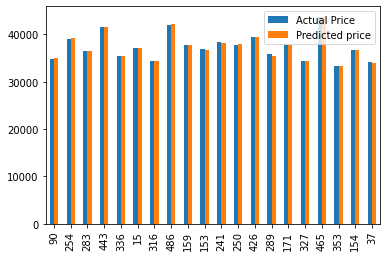

In [53]:
df.head(20).plot(kind='bar')